In [2]:
## Import necessary libraries
from scipy.io import wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
import os

from scipy import fftpack

In [3]:
## Create 2 signals

n = np.arange(0,1,1.0/500)
x1 = np.sin(2*np.pi*10*n)
x2 = np.cos(2*np.pi*10*n)

In [4]:
## Zeros pad them before performing a larger size DFT

x1_pad = np.hstack((x1,np.zeros(x1.shape)))
x2_pad = np.hstack((x2,np.zeros(x2.shape)))

In [5]:
## checking similarity

X1 = fftpack.fft(x1_pad)
X2 = fftpack.fft(x2_pad)

X1X2 = X1 * np.conj(X2)
x1x2_r = fftpack.ifft(X1X2)

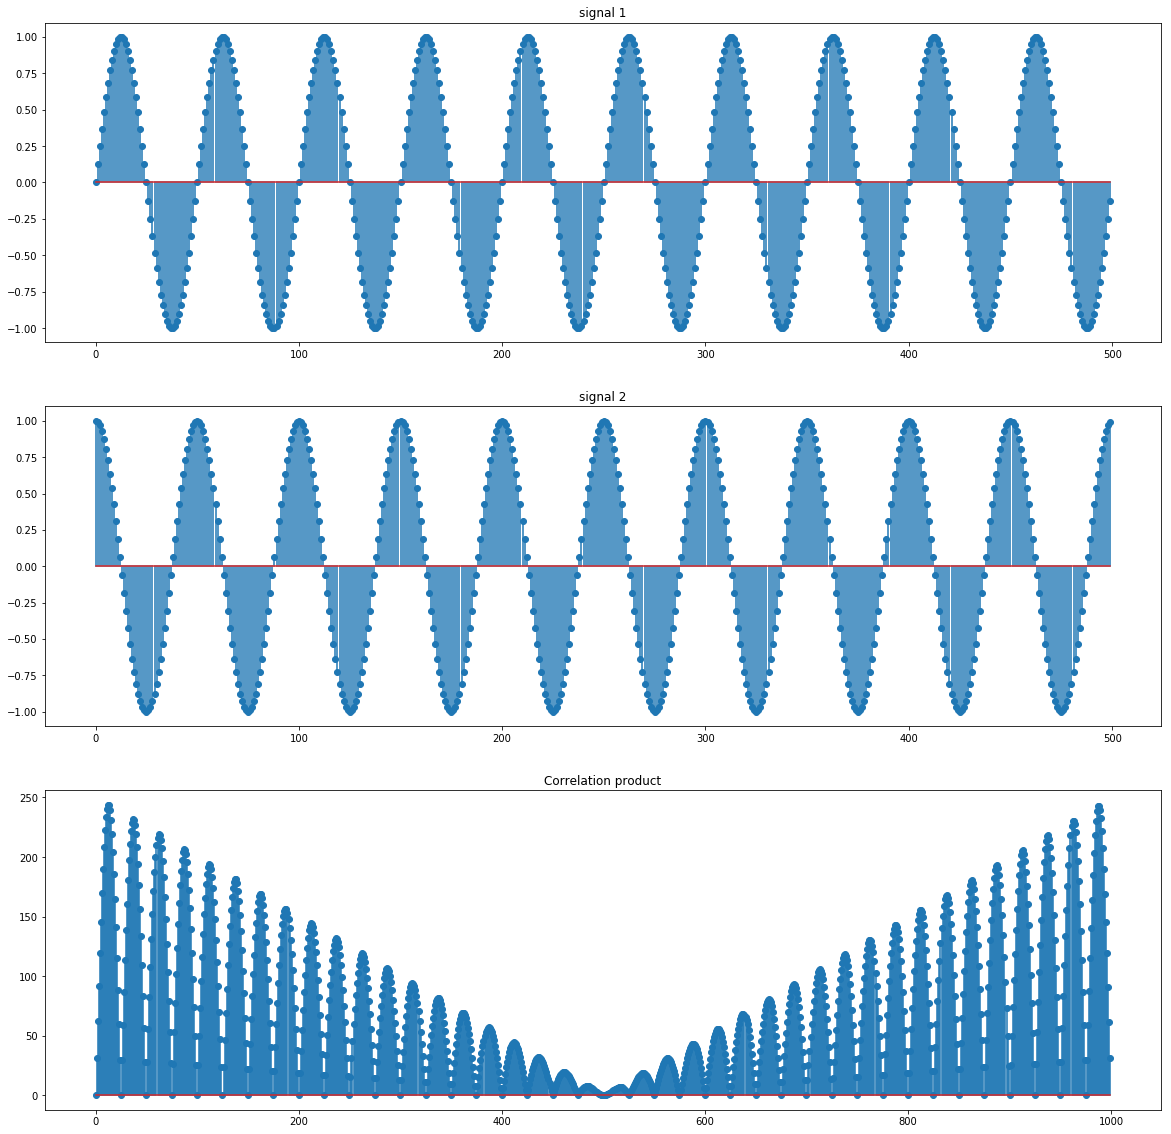

In [9]:
fig,ax = plt.subplots(3,1,figsize = (20,20))
ax[0].set_title("signal 1")
ax[0].stem(x1)
ax[1].set_title("signal 2")
ax[1].stem(x2)
ax[2].set_title("Correlation product")
ax[2].stem(np.abs(x1x2_r))
plt.show()

In [10]:
np.where(x1x2_r == x1x2_r.max())

(array([12]),)

## Applying this concept to non-periodic audio signals

In [18]:
path = "./sounds/piano.wav"

fs,x = wav.read(path)
x = x - x.mean()
search = x[1000:5000]

In [20]:
x_pad = np.hstack((x,np.zeros(x.shape)))
search_pad = np.zeros_like(x_pad)

## adding noise to test robustness
search_pad[:4000] = search + 100 * np.random.rand(4000,) + 100

In [21]:
X = fftpack.fft(x_pad)
S = fftpack.fft(search_pad)
XS = X * np.conj(S)

xs = np.abs(fftpack.ifft(XS))

In [22]:
np.where(xs == xs.max())

(array([1000]),)